In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import torch

import matplotlib as plt
import matplotlib.pyplot as plt

from platform import python_version

print(python_version())
print(torch.__version__)

3.7.6
1.13.1+cpu


In [2]:
# reading the dataset into Pandas and Numpy dataframes
df = pd.read_excel("datasets/Railway Data_JL.xlsx")
df_numpy = df.to_numpy()

In [3]:
df.head(10)

,train,st_no,st_id,date,arr_time,dep_time,stay_time,mileage,lat,lon
0,1095,1,692,Day 1,19:06:00,19:06:00,-,0,37.86048,112.58682
1,1095,2,1351,Day 1,19:27:00,19:32:00,5,27,37.69719,112.73118
2,1095,3,698,Day 1,19:59:00,20:01:00,2,63,37.42136,112.57032
3,1095,4,944,Day 1,20:31:00,20:35:00,4,108,37.20661,112.16847
4,1095,5,232,Day 1,21:00:00,21:04:00,4,139,37.01847,111.91906
5,1095,6,1639,Day 1,21:29:00,21:31:00,2,166,36.86171,111.77102
6,1095,7,2335,Day 1,22:07:00,22:09:00,2,209,36.58583,111.71973
7,1095,8,1512,Day 1,22:46:00,22:48:00,2,251,36.26214,111.67162
8,1095,9,127,Day 1,23:11:00,23:27:00,1,274,36.08683,111.53682
9,1095,10,259,Day 2,00:16:00,00:20:00,4,334,35.61313,111.35850


In [4]:
df.info()
'''train, date, arr_time, dep_time, stay_time and mileage columns are object types and have to be converted to numeric'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69638 entries, 0 to 69637
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   train      69638 non-null  object 
 1   st_no      69638 non-null  int64  
 2   st_id      69638 non-null  int64  
 3   date       69638 non-null  object 
 4   arr_time   69638 non-null  object 
 5   dep_time   69638 non-null  object 
 6   stay_time  69638 non-null  object 
 7   mileage    69638 non-null  object 
 8   lat        69638 non-null  float64
 9   lon        69638 non-null  float64
dtypes: float64(2), int64(2), object(6)
memory usage: 5.3+ MB


'train, date, arr_time, dep_time, stay_time and mileage columns are object types and have to be converted to numeric'

In [5]:
# Viewing unique values for adequate columns
print( df['train'].unique(), df['st_no'].unique(), df['st_id'].unique(),  df['date'].unique(), '\n', 
      df['arr_time'].unique(), df['dep_time'].unique(), df['stay_time'].unique(), df['mileage'].unique() )


[1095 1096 1133 ... 'Z93' 'Z94' 'Z97'] [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62] [ 692 1351  698 ... 2657 2682 2684] ['Day 1' 'Day 2' 'Day 3' 'Day 4'] 
 [datetime.time(19, 6) datetime.time(19, 27) datetime.time(19, 59) ...
 0.30625 0.974305556 0.167361111] [datetime.time(19, 6) datetime.time(19, 32) datetime.time(20, 1) ...
 0.111111111 0.249305556 0.171527778] ['-' 5 2 4 1 3 8 7 6 9 ' ' 11 10 26 15 13 17 20 16 25 28 14 12 18 40] [0 27 63 ... 2637 3015 2554]


In [6]:
# function to display the dataframe for each particular train
def df_bytrainid(train_id, dataframe):
    df_train_id = dataframe[dataframe['train'] == train_id]
    #display(df_train_id)
    return df_train_id

df_bytrainid(1133, df)

,train,st_no,st_id,date,arr_time,dep_time,stay_time,mileage,lat,lon
43,1133,1,683,Day 1,20:52:00,20:52:00,-,,39.134968,117.209465
44,1133,2,983,Day 1,21:40:00,21:45:00,5,63,39.514917,116.705679
45,1133,3,390,Day 1,22:35:00,23:01:00,2,127,39.896042,116.321152
46,1133,4,804,Day 2,01:57:00,02:00:00,3,292,40.598030,115.057120
47,1133,5,1005,Day 2,02:25:00,02:35:00,1,317,40.753610,114.885090
48,1133,6,1309,Day 2,03:14:00,03:16:00,2,361,40.671140,114.416040
49,1133,7,627,Day 2,05:17:00,05:32:00,1,495,40.120110,113.303110
50,1133,8,123,Day 2,06:10:00,06:12:00,2,540,40.435180,113.163370
51,1133,9,2330,Day 2,07:17:00,07:23:00,6,622,41.031426,113.099336
52,1133,10,529,Day 2,08:44:00,20:52:00,8,772,40.850342,111.765567


In [7]:
# Day 4
df[df['date'] == 'Day 4']['train'].unique()

array(['K1501', 'K1502', 'K1503', 'K1504', 'K2285', 'K2286', 'K2287',
       'K2288', 'K2386', 'K2387'], dtype=object)

Replacing value '-' and ' ' in stay_time and mileage by adequate values

In [8]:
# Replacing '-' with value 0
df_filled = df.replace('-', 0)

# Replacing ' ' in every first station's mileage with 0
for i in range(len(df.index)):
    if (df_filled['st_no'][i] == 1 and df_filled['mileage'][i] == ' '):
        df_filled['mileage'][i] = 0

# Replacing ' ' in last stations with last known mileage value
for i in range(len(df.index)):
    if (df_filled['st_no'][i] != 1 and df_filled['mileage'][i] == ' '):
        df_filled['mileage'][i] = df_filled['mileage'][i-1]

df_bytrainid(1133, df_filled)


c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
c:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,train,st_no,st_id,date,arr_time,dep_time,stay_time,mileage,lat,lon
43,1133,1,683,Day 1,20:52:00,20:52:00,0,0,39.134968,117.209465
44,1133,2,983,Day 1,21:40:00,21:45:00,5,63,39.514917,116.705679
45,1133,3,390,Day 1,22:35:00,23:01:00,2,127,39.896042,116.321152
46,1133,4,804,Day 2,01:57:00,02:00:00,3,292,40.598030,115.057120
47,1133,5,1005,Day 2,02:25:00,02:35:00,1,317,40.753610,114.885090
48,1133,6,1309,Day 2,03:14:00,03:16:00,2,361,40.671140,114.416040
49,1133,7,627,Day 2,05:17:00,05:32:00,1,495,40.120110,113.303110
50,1133,8,123,Day 2,06:10:00,06:12:00,2,540,40.435180,113.163370
51,1133,9,2330,Day 2,07:17:00,07:23:00,6,622,41.031426,113.099336
52,1133,10,529,Day 2,08:44:00,20:52:00,8,772,40.850342,111.765567


Dropping 'arr_time', 'dep_time', 'stay_time' and replacing them by 'travel_time' ?

In [9]:
# Converting Datetime.time to Datetime.Datetime in order to compute the difference
'''df_filled['dep_time'][43] - df_filled['arr_time'][43]'''

"df_filled['dep_time'][43] - df_filled['arr_time'][43]"

In [10]:
type(df_filled['arr_time'][43])

datetime.time

In [11]:
# Checking for values 'null' and 'NaN'
df.isnull().sum()
df.isna().sum()

train        0
st_no        0
st_id        0
date         0
arr_time     0
dep_time     0
stay_time    0
mileage      0
lat          0
lon          0
dtype: int64

In [12]:
print( df['stay_time'].unique() )
df['st_id'].unique()

['-' 5 2 4 1 3 8 7 6 9 ' ' 11 10 26 15 13 17 20 16 25 28 14 12 18 40]


array([ 692, 1351,  698, ..., 2657, 2682, 2684], dtype=int64)

In [13]:
# Creating a graph G and adding the nodes = Train stations
G = nx.Graph()

for st_id in df['st_id'].unique():
    G.add_node(st_id)

G.number_of_nodes()

2719

In [14]:
# Adding edges
for i, row in df.iterrows():
    if i > 0 and df['train'][i] == df['train'][i-1]:
        G.add_edge(df['st_id'][i-1], df['st_id'][i])

G.number_of_edges()

6173

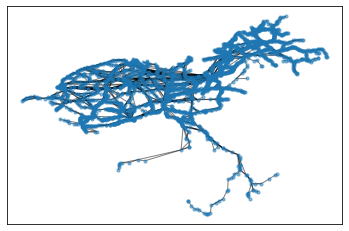

In [15]:
pos = {st_id: (df[df['st_id']==st_id]['lat'].iloc[0], df[df['st_id']==st_id]['lon'].iloc[0]) for st_id in G.nodes()}
nx.draw_networkx(G, pos=pos, node_size=10, alpha=0.5, with_labels=False)
plt.show()

MODEL PROTO

In [16]:
'''from mpl_toolkits.basemap import Basemap

# create a map
m = Basemap(projection='merc', llcrnrlon=-180, llcrnrlat=-80, urcrnrlon=180, urcrnrlat=80, resolution='c')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='gray', lake_color='blue')

# convert coordinates
pos = {}
for node in G.nodes():
    pos[node] = m(G.nodes[node]['lon'], G.nodes[node]['lat'])

# plot nodes
nx.draw_networkx_nodes(G, pos, node_size=100, node_color='red')

# plot edges
nx.draw_networkx_edges(G, pos, width=2, edge_color='blue')

plt.show()'''

"from mpl_toolkits.basemap import Basemap\n\n# create a map\nm = Basemap(projection='merc', llcrnrlon=-180, llcrnrlat=-80, urcrnrlon=180, urcrnrlat=80, resolution='c')\nm.drawcoastlines()\nm.drawcountries()\nm.fillcontinents(color='gray', lake_color='blue')\n\n# convert coordinates\npos = {}\nfor node in G.nodes():\n    pos[node] = m(G.nodes[node]['lon'], G.nodes[node]['lat'])\n\n# plot nodes\nnx.draw_networkx_nodes(G, pos, node_size=100, node_color='red')\n\n# plot edges\nnx.draw_networkx_edges(G, pos, width=2, edge_color='blue')\n\nplt.show()"

DATA VISUALISATION FOR EACH TRA2IN

In [17]:
import folium

In [20]:
def network_bytrain(train_id):


    df_bytrain = df_bytrainid(train_id, df_filled)

    # Creating a graph G and adding the nodes = Train stations
    G_bytrain = nx.Graph()


    for st_id in df_bytrain['st_id'].unique():
        G_bytrain.add_node(st_id)

    G_bytrain.number_of_nodes()

    df_bytrain = df_bytrain.reset_index()

    # Adding edges
    for i in range(len(df_bytrain)):
        if i > 0 :
            G_bytrain.add_edge(df_bytrain['st_id'][i-1], df_bytrain['st_id'][i])



    pos_bytrain = {st_id: (df_bytrain[df_bytrain['st_id']==st_id]['lat'].iloc[0], df_bytrain[df_bytrain['st_id']==st_id]['lon'].iloc[0]) for st_id in G_bytrain.nodes()}


    # Create a folium map object
    n = folium.Map(location=[0, 0], zoom_start=2, tiles='Stamen Terrain')

    # Add markers for each node
    for node in G_bytrain.nodes():
        folium.Marker(location=pos_bytrain[node], popup=f'Node {node}', icon=folium.Icon(color='red', icon='fa-train', prefix='fa', icon_color='white')).add_to(n)

    # Add lines connecting the nodes
    for edge in G_bytrain.edges():
        folium.PolyLine(locations=[pos_bytrain[edge[0]], pos_bytrain[edge[1]]]).add_to(n)

    # Display the map
    return n

In [23]:
network_bytrain(1133)